In [50]:
# Importing the basic libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pdb
import os
plt.style.use('seaborn-darkgrid')

In [51]:
# Loading the data. 查看当前目录下的文件
print(os.listdir('./'))

['.ipynb_checkpoints', 'Abalone Age Prediction.ipynb', 'abalone.csv', 'Ionosphere.ipynb', 'ionosphere_data.csv', 'result.png']


In [52]:
# Loading the data. 
# we will check how good or bad the data is, that we already have. 
data = pd.read_csv('./ionosphere_data.csv')

In [53]:
# checking the data. 
print(data.shape)

(351, 35)


In [54]:
# checking the sample data for data. 
data.head(20)

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,True,False,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,True,False,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,False,False,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,True,False,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,True,False,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [55]:
# checking basic statistics of data.  统计数据
data.describe()

,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,...,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Checking the information about the data. 查看非缺失值总数
# this will tell us how many and what type of columns/rows we have in the data. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    bool   
 1   column_b   351 non-null    bool   
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p   351 non-null    float64
 16  column_q   351 non-null    float64
 17  column_r   351 non-null    float64
 18  column_s   351 non-null    float64
 19  column_t   351 non-null    float64
 20  column_u  

In [57]:
# Creating a list of columns which are numeric. 
numeric_cols = list(data.select_dtypes(exclude='object').columns)
print(len(numeric_cols))
print(numeric_cols)

34
['column_a', 'column_b', 'column_c', 'column_d', 'column_e', 'column_f', 'column_g', 'column_h', 'column_i', 'column_j', 'column_k', 'column_l', 'column_m', 'column_n', 'column_o', 'column_p', 'column_q', 'column_r', 'column_s', 'column_t', 'column_u', 'column_v', 'column_w', 'column_x', 'column_y', 'column_z', 'column_aa', 'column_ab', 'column_ac', 'column_ad', 'column_ae', 'column_af', 'column_ag', 'column_ah']


In [58]:
# 为了在生成数据集报告时不引入index索引，故将索引删去
d = data.reset_index(drop=True)

In [59]:
# # using pandas profiler once to look into all the data columns. 
# data_profile = pdb.ProfileReport(d)
# data_profile

In [60]:
df = data.copy()
df['column_ai'] = df['column_ai'].map({'g': 0, 'b': 1})

# 修改特征名
df.rename(columns={'column_ai': 'Class'}, inplace=True)# 

标签为0占比:0.6410256410256411, 标签为1占比:0.358974358974359


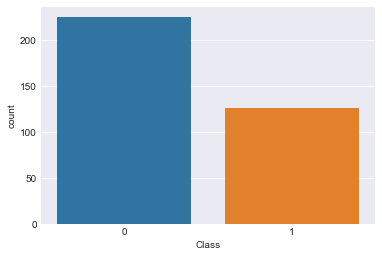

In [61]:
# 标签不平衡
sns.countplot(x='Class', data=df)
num0, num1 = 0, 0
label = df['Class']
for i in label:
    if i == 0:
        num0 +=1
    else:
        num1 += 1
print("标签为0占比:{0}, 标签为1占比:{1}".format(num0/len(label), num1/len(label)))

In [62]:
df['column_a'] = [1 if i == True else 0 for i in df['column_a']]
df['column_b'] = [1 if i == True else 0 for i in df['column_b']]
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [78]:
label = df['Class']
print(type(df))
data = df.drop(columns='Class', axis=1)
print("label.shape:",label.shape, "\ndata.shape:", data.shape)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
label.shape: (351,) 
data.shape: (351, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    int64  
 1   column_b   351 non-null    int64  
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p   351 non-null    float64
 16  column_q   351 non-null    float64
 17  column_r   351 non-null    float64
 18  column_s 

In [73]:
# 根据训练集：测试集 = 4：1划分数据
from sklearn.model_selection import train_test_split
import random 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression


X = data
Y = label
logreg = LogisticRegression()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.81690141 0.78571429 0.85714286 0.91428571 0.88571429]
Average Cross Validation score :0.8519517102615695


In [74]:
from sklearn.neighbors import KNeighborsClassifier


estimator = KNeighborsClassifier()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(estimator, X, Y, cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.83098592 0.77142857 0.8        0.88571429 0.84285714]
Average Cross Validation score :0.8261971830985916


In [80]:
# 训练二元分类器

print(type(data))
print(data.shape)
print(data.info())
# X = data.drop(columns=['column_b'], axis=1)
print(type(X))
print(X.shape)
Y = label
estimator = KNeighborsClassifier()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(estimator, X, Y, cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

<class 'pandas.core.frame.DataFrame'>
(351, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    int64  
 1   column_b   351 non-null    int64  
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p   351 non-null    float64
 16  column_q   351 non-null    float64
 17  column_r   351 non-null    float64
 18  column_s   351 non-null    float64
 19  co

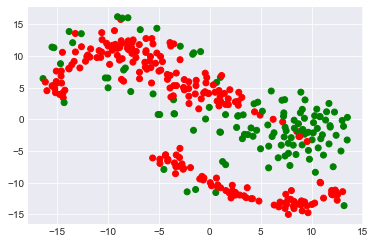

In [95]:
from sklearn.manifold import TSNE

x_train = data
y_train = label

x_embedded = TSNE(n_components=2).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

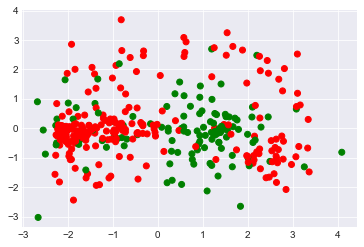

In [120]:
from sklearn.decomposition import PCA

x_embedded = PCA(n_components=10).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

In [121]:
print(type(x_embedded))
print(len(x_embedded))
print(x_embedded.shape)

<class 'numpy.ndarray'>
351
(351, 10)


In [122]:
# 根据训练集：测试集 = 4：1划分数据
from sklearn.model_selection import train_test_split
import random 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression


X = x_embedded
Y = label
logreg = LogisticRegression()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.8028169  0.7        0.9        0.9        0.91428571]
Average Cross Validation score :0.843420523138833


In [123]:
from sklearn.neighbors import KNeighborsClassifier


estimator = KNeighborsClassifier()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(estimator, X, Y, cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.88732394 0.81428571 0.8        0.92857143 0.88571429]
Average Cross Validation score :0.8631790744466802


In [127]:
best_score, best_i = 0, 0
for i in range(1, 34):
    x_embedded = PCA(n_components=i).fit_transform(x_train)
#     plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
    print(i)
    X = x_embedded
    Y = label
    logreg = LogisticRegression()
    stratifiedkf = StratifiedKFold(n_splits=5)
    score = cross_val_score(logreg,X,Y,cv=stratifiedkf)
#     print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    print('-'*10)
    
    if score.mean() > best_score:
        best_score, best_i = score.mean(), i
    
    estimator = KNeighborsClassifier()
    stratifiedkf = StratifiedKFold(n_splits=5)
    score = cross_val_score(estimator, X, Y, cv=stratifiedkf)
#     print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    if score.mean() > best_score:
        best_score, best_i = score.mean(), i
    print('*'*15)

    
print("Ans:", best_score, best_i)
    

1
Average Cross Validation score :0.5524748490945675
----------
Average Cross Validation score :0.7605231388329979
***************
2
Average Cross Validation score :0.5496981891348088
----------
Average Cross Validation score :0.7922334004024145
***************
3
Average Cross Validation score :0.8006841046277666
----------
Average Cross Validation score :0.8746478873239436
***************
4
Average Cross Validation score :0.8518309859154929
----------
Average Cross Validation score :0.8547283702213282
***************
5
Average Cross Validation score :0.8461167002012072
----------
Average Cross Validation score :0.8830583501006037
***************
6
Average Cross Validation score :0.8461167002012072
----------
Average Cross Validation score :0.883138832997988
***************
7
Average Cross Validation score :0.8404426559356135
----------
Average Cross Validation score :0.8803219315895372
***************
8
Average Cross Validation score :0.8575855130784709
----------
Average Cross Valida

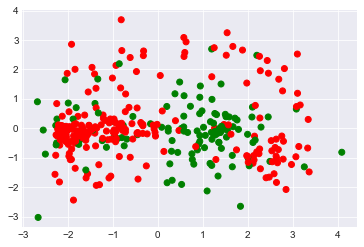

Average Cross Validation score :0.883138832997988


In [128]:
x_embedded = PCA(n_components=6).fit_transform(x_train)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], color=['green' if label else 'red' for label in y_train])
plt.show()

X = x_embedded
Y = label

estimator = KNeighborsClassifier()
stratifiedkf = StratifiedKFold(n_splits=5)
score = cross_val_score(estimator, X, Y, cv=stratifiedkf)
#     print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))